<a href="https://colab.research.google.com/github/Ke-vin-S/Google_colab/blob/ml_lab/predicting_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [389]:
# pandas settings
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent horizontal truncation


In [390]:
df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [391]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [392]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [394]:
df.shape
test_df.shape

(93800, 19)

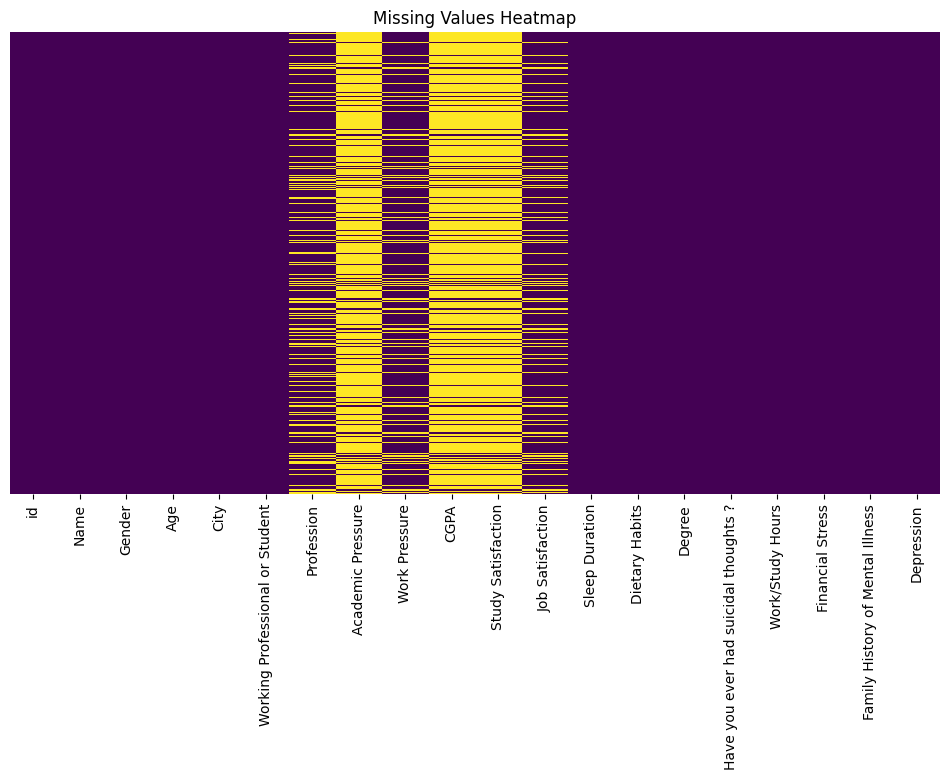

In [395]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## DataSet seems eveny distributed in terms of missing values

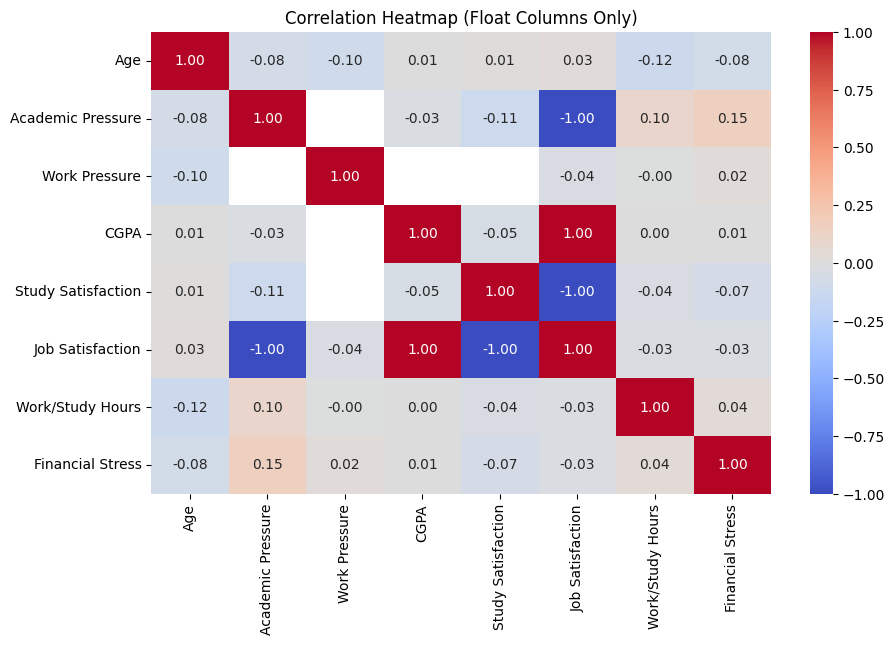

In [396]:
# Select only float (numerical) columns
float_cols = df.select_dtypes(include=['float64']).columns
df_float = df[float_cols]

# Compute correlation matrix
corr_matrix = df_float.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Float Columns Only)")
plt.show()

## in this -1 correlation is not a correlation of values but result of how null values are distributed,
- Eg: where job satisfaction is null, study satisfaction is not null
- and vice versa


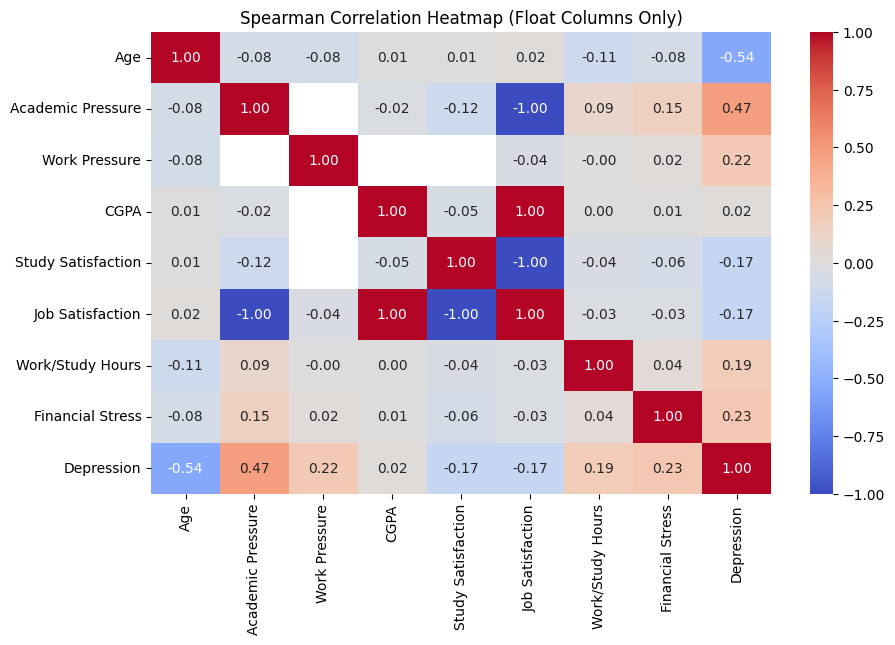

In [397]:
# Select only float (numerical) columns
float_cols = df.select_dtypes(include=['float64', 'int64']).columns
float_cols = float_cols.drop('id')
df_float = df[float_cols]

# Compute correlation matrix
corr_matrix = df_float.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman Correlation Heatmap (Float Columns Only)")
plt.show()

# Handle missing, undesired values

## Duplicate records

In [398]:
# Count duplicates before dropping
duplicate_count = df.duplicated().sum()

# Drop duplicates
df = df.drop_duplicates()

print(f"✅ Removed {duplicate_count} duplicate rows.")

✅ Removed 0 duplicate rows.


## Clean CGPA
- added 'CGPA_Missing' to professionals

In [399]:
df['CGPA'].value_counts()

,count
CGPA,
8.0400,822
9.9600,425
5.7400,410
8.9500,371
9.2100,343
7.2500,339
7.0900,320
7.8800,318
9.4400,317


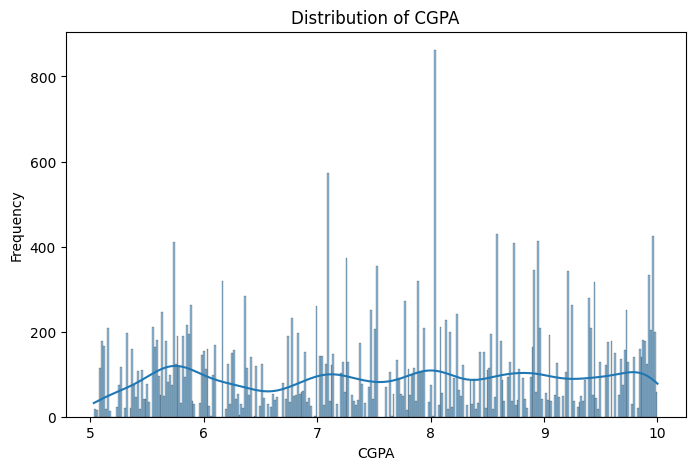

In [400]:
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], bins=300, kde=True)
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title("Distribution of CGPA")
plt.show()

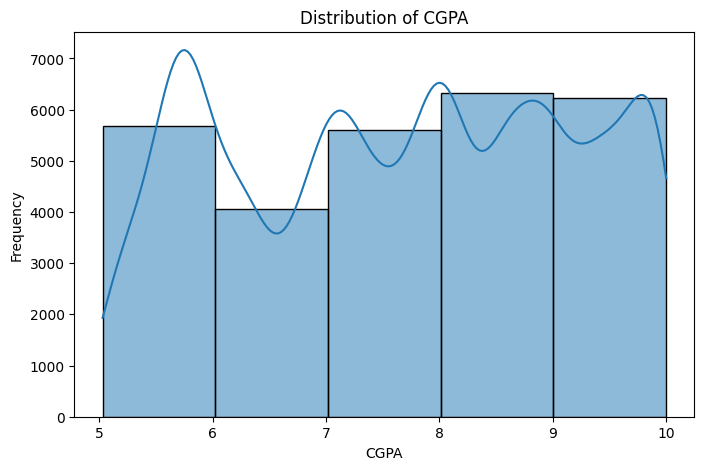

In [401]:
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], bins=5, kde=True)  # Bin size adjusted for 5-10 range
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title("Distribution of CGPA")
plt.xticks(range(5, 11))  # Ensures x-axis has integer CGPA values
plt.show()

In [402]:
df['CGPA'].describe()

,CGPA
count,27898.000000
mean,7.658636
std,1.464466
min,5.030000
25%,6.290000
50%,7.770000
75%,8.920000
max,10.000000


## Clean Sleep duration

In [403]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,38784
7-8 hours,36969
More than 8 hours,32726
5-6 hours,32142
3-4 hours,12
6-7 hours,8
4-5 hours,7
4-6 hours,5
2-3 hours,5


- need to clean this
- and should encode
  - encode to categorical or numercial, because discrete numerical value will give the model as sense of comparison

- https://ars.els-cdn.com/content/image/1-s2.0-S1389945724000212-gr1a_lrg.jpg


In [404]:
# define function for clean non relaistic and problematic values
def clean_sleep_duration(value):
    value = str(value).lower().strip()

    # standard categories
    if "less than 5" in value or "than 5" in value or value in ["1-3 hours", "2-3 hours", "3-4 hours", "4-5 hours"]:
        return "Less than 5 hours"
    elif "5-6" in value or "6-5" in value:
        return "5-6 hours"
    elif "6-7" in value:
        return "6-7 hours"
    elif "7-8" in value or "6-8" in value:
        return "7-8 hours"
    elif "8-9" in value or "8 hours" in value:
        return "8-9 hours"
    elif "9-11" in value or "9-10" in value or "10-11" in value:
        return "9-11 hours"
    elif "45-48" in value or "49" in value or "55-66" in value or "35-36" in value or "40-45" in value:
        return np.nan
    else:
        return np.nan

In [405]:
df['Sleep Duration'] = df['Sleep Duration'].apply(clean_sleep_duration)
print(df['Sleep Duration'].value_counts(dropna=False))

test_df['Sleep Duration'] = test_df['Sleep Duration'].apply(clean_sleep_duration)
print(test_df['Sleep Duration'].value_counts(dropna=False))

Sleep Duration
Less than 5 hours    38810
7-8 hours            36973
8-9 hours            32730
5-6 hours            32143
NaN                     32
6-7 hours                8
9-11 hours               4
Name: count, dtype: int64
Sleep Duration
Less than 5 hours    25676
7-8 hours            24491
8-9 hours            22196
5-6 hours            21404
NaN                     24
6-7 hours                7
9-11 hours               2
Name: count, dtype: int64


- seems as kind of uniform distribution among top categories
- there is a sense of order
- so label encoding?

## Clean Age
- No problem in this as it seems
- but there are some values which has more examples
  - binning?

In [406]:
df['Age'].value_counts()

,count
Age,
56.0,5246
49.0,5099
38.0,4564
53.0,4526
57.0,4395
47.0,4199
46.0,4080
54.0,3928
51.0,3927


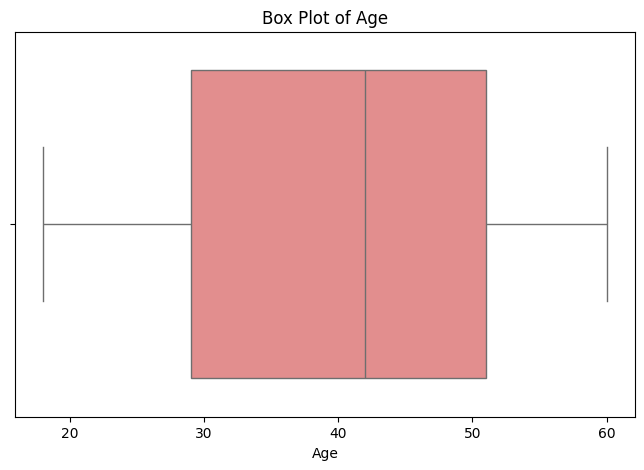

In [407]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], color='lightcoral')
plt.xlabel("Age")
plt.title("Box Plot of Age")
plt.show()

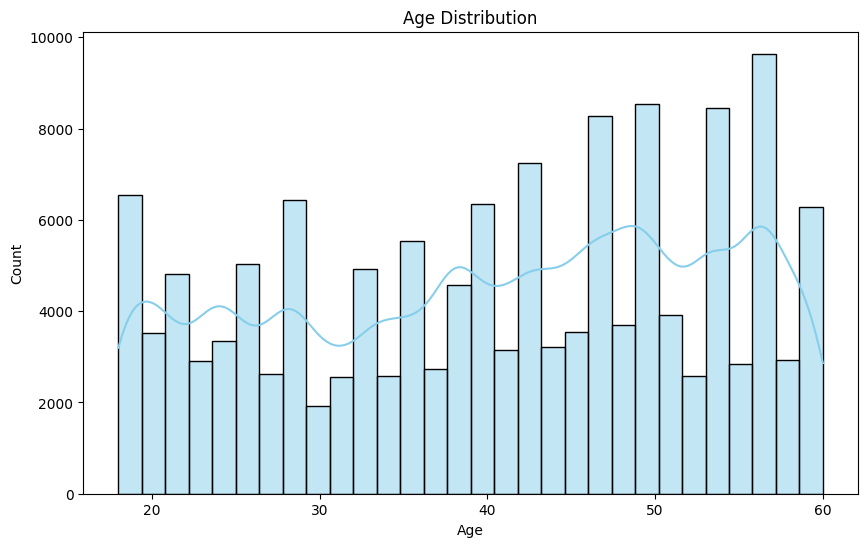

In [408]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')  # kde=True adds a smooth density curve
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

## Clean Degree
- replaced not common values with other category
- more encoding needed?
- use consistent degree mapping

In [409]:
print(df['Degree'].value_counts())

Degree
Class 12                14729
B.Ed                    11691
B.Arch                   8742
B.Com                    8113
B.Pharm                  5856
BCA                      5739
M.Ed                     5668
MCA                      5234
BBA                      5030
BSc                      5027
MSc                      4879
LLM                      4647
M.Pharm                  4537
M.Tech                   4475
B.Tech                   4425
LLB                      4348
BHM                      4305
MBA                      3818
BA                       3750
ME                       3632
MD                       3383
MHM                      3286
BE                       3104
PhD                      3103
M.Com                    3094
MBBS                     3082
MA                       2887
M.Arch                      5
UX/UI Designer              4
M                           3
Kalyan                      3
B.Sc                        3
LL B.Ed                     2
BEd

In [410]:
# Count occurrences of each degree
degree_counts = df["Degree"].value_counts()

# Filter degrees with more than 100 holders
degrees_over_100 = degree_counts[degree_counts > 100]

# Display results
print(len(degrees_over_100))

27


In [411]:
import pandas as pd

# Convert to lowercase and strip spaces
df["Degree"] = df["Degree"].str.lower().str.strip()
test_df["Degree"] = test_df["Degree"].str.lower().str.strip()

# Standardization mapping
degree_mapping = {
    "barch": "b.arch", "bcom": "b.com", "bpharm": "b.pharm", "bca": "bca",
    "bba": "bba", "bsc": "b.sc", "msc": "m.sc", "llm": "ll.m", "mpharm": "m.pharm",
    "mtech": "m.tech", "btech": "b.tech", "llb": "ll.b", "mba": "mba", "me": "m.e",
    "md": "m.d", "mhm": "m.h.m", "be": "b.e", "phd": "ph.d", "mcom": "m.com",
    "mbbs": "mbbs", "ma": "m.a", "march": "m.arch", "mpa": "m.p.a", "med": "m.ed",
    "bed": "b.ed", "bpa": "b.p.a"
}

# Apply mapping to standardize degree names
df["Degree"] = df["Degree"].map(lambda x: degree_mapping.get(x, x))
test_df["Degree"] = test_df["Degree"].map(lambda x: degree_mapping.get(x, x))

# Count occurrences of each degree
degree_counts = df["Degree"].value_counts()
test_degree_counts = test_df["Degree"].value_counts()

# Filter degrees with more than 100 holders
degrees_over_100 = degree_counts[degree_counts > 100]

# Replace degrees with 10 or fewer holders with "other"
df["Degree"] = df["Degree"].apply(lambda x: x if (degree_counts.get(x, 0) > 10 or pd.isna(x)) else "other")
test_df["Degree"] = test_df["Degree"].apply(lambda x: x if (test_degree_counts.get(x, 0) > 10 or pd.isna(x)) else "other")

df["Degree"] = df["Degree"].fillna("other")
test_df["Degree"] = test_df["Degree"].fillna("other")

# Check the final count of degrees
print(df["Degree"].value_counts(dropna=False))

Degree
class 12    14729
b.ed        11693
b.arch       8744
b.com        8113
b.pharm      5858
bca          5739
m.ed         5670
mca          5234
bba          5030
b.sc         5030
m.sc         4879
ll.m         4647
m.pharm      4538
m.tech       4476
b.tech       4425
ll.b         4348
bhm          4305
mba          3818
ba           3750
m.e          3632
m.d          3383
m.h.m        3286
b.e          3104
ph.d         3103
m.com        3094
mbbs         3082
m.a          2887
other         103
Name: count, dtype: int64


## Clean gender
- used binary mapping- male: 0 and female: 1

In [412]:
df['Gender'].value_counts()

,count
Gender,
Male,77464
Female,63236


In [413]:
# df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
# test_df["Gender"] = test_df["Gender"].map({"Male": 0, "Female": 1})

## Clean working proffesional or student
- encoded "Student": 0, "Working Professional": 1

In [414]:
df['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112799
Student,27901


In [415]:
# df['Working Professional or Student'] = df['Working Professional or Student'].map({"Student": 0, "Working Professional": 1})
# test_df['Working Professional or Student'] = test_df['Working Professional or Student'].map({"Student": 0, "Working Professional": 1})

## Clean profession
- ignore cleaning it for first model
- but will be better if cleaned

In [416]:
df['Profession'].value_counts(dropna=False)

,count
Profession,
NaN,36630
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
HR Manager,4022
Pharmacist,3893
Doctor,3255
Business Analyst,3161


## Clean Pressure
- add 0 for NaN
- if combining both, decide what to do wher both fields present

In [417]:
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7463
5.0,6296
4.0,5158
1.0,4801
2.0,4179


In [418]:
df['Work Pressure'].value_counts()

,count
Work Pressure,
2.0,24373
4.0,22512
5.0,22436
3.0,21899
1.0,21562


In [419]:
# df["Academic Pressure"].fillna(0, inplace=True)
# df["Work Pressure"].fillna(0, inplace=True)
# test_df["Academic Pressure"].fillna(0, inplace=True)
# test_df["Work Pressure"].fillna(0, inplace=True)

## Clean Satisfaction


In [420]:
df['Study Satisfaction'].value_counts(dropna=False)

,count
Study Satisfaction,
NaN,112803
4.0,6360
2.0,5840
3.0,5823
1.0,5451
5.0,4423


In [421]:
df['Job Satisfaction'].value_counts(dropna=False)

,count
Job Satisfaction,
NaN,27910
2.0,24783
5.0,22812
1.0,22324
3.0,21951
4.0,20920


In [422]:
# df['Study Satisfaction'].fillna(0, inplace=True)
# df['Job Satisfaction'].fillna(0, inplace=True)

# test_df['Study Satisfaction'].fillna(0, inplace=True)
# test_df['Job Satisfaction'].fillna(0, inplace=True)

## Clean city
- not done
- If you're using cities as features: Use frequency encoding instead of fixing errors.
- If cities are not critical: Group rare ones into "other" and move on.

In [423]:
df['City'].value_counts()

,count
City,
Kalyan,6591
Patna,5924
Vasai-Virar,5765
Kolkata,5689
Ahmedabad,5613
Meerut,5528
Ludhiana,5226
Pune,5210
Rajkot,5207


In [424]:
city_counts = df['City'].value_counts()
top_cities = city_counts[city_counts > 100].index

# Replace rare cities with 'Other'
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')
test_df['City'] = test_df['City'].apply(lambda x: x if x in top_cities else 'Other')

# Check the result
print(df['City'].value_counts())

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Other              98
Name: count, dtype: int64


## Clean dietary habits
- invalid values has so small amount of data points
- 50,000 : 20 is pretty low
- and we have to expect those in test data
- so map all that to moderate values

In [425]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,49705
Unhealthy,46227
Healthy,44741
Yes,2
More Healthy,2
No,2
Pratham,1
Gender,1
BSc,1


In [426]:
valid_categories = {"Moderate", "Unhealthy", "Healthy"}

df["Dietary Habits"] = df["Dietary Habits"].apply(lambda x: x if x in valid_categories else "Moderate")

test_df["Dietary Habits"] = test_df["Dietary Habits"].apply(lambda x: x if x in valid_categories else "Moderate")

## Clean: Have you ever had suicidal thoughts ?
- "yes": 1, "no": 0

In [427]:
df['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
No,71138
Yes,69562


In [428]:
# df["Have you ever had suicidal thoughts ?"] = df['Have you ever had suicidal thoughts ?'].map({"Yes": 1, "No": 0})
# test_df["Have you ever had suicidal thoughts ?"] = test_df['Have you ever had suicidal thoughts ?'].map({"Yes": 1, "No": 0})

## Clean Work/Study Hours
- nothing to do

In [429]:
df['Work/Study Hours'].value_counts(dropna=False)

,count
Work/Study Hours,
10.0,14199
11.0,12832
9.0,12711
0.0,12066
12.0,11409
2.0,10595
6.0,10432
7.0,9872
1.0,9802


## Clean Financial Stress
- NaN replaced with mode

In [430]:
df['Financial Stress'].value_counts(dropna=False)

,count
Financial Stress,
2.0,31451
5.0,28279
4.0,27765
1.0,27211
3.0,25990
NaN,4


In [431]:
df["Financial Stress"].fillna(df["Financial Stress"].mode()[0], inplace=True)
test_df["Financial Stress"].fillna(test_df["Financial Stress"].mode()[0], inplace=True)

<ipython-input-431-039eeaa09260>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Financial Stress"].fillna(df["Financial Stress"].mode()[0], inplace=True)
<ipython-input-431-039eeaa09260>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

## Clean Family History of Mental Illness
- "Yes": 1, "No": 0

In [432]:
df['Family History of Mental Illness'].value_counts(dropna=False)

,count
Family History of Mental Illness,
No,70758
Yes,69942


In [433]:
# df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({"Yes": 1, "No": 0})
# test_df['Family History of Mental Illness'] = test_df['Family History of Mental Illness'].map({"Yes": 1, "No": 0})

## Explore for conncetion between gender and depression
:

In [434]:
df.groupby("Gender")["Depression"].mean()

,Depression
Gender,
Female,0.178237
Male,0.184550


<ipython-input-435-019f1db4ffe5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age", palette="viridis")


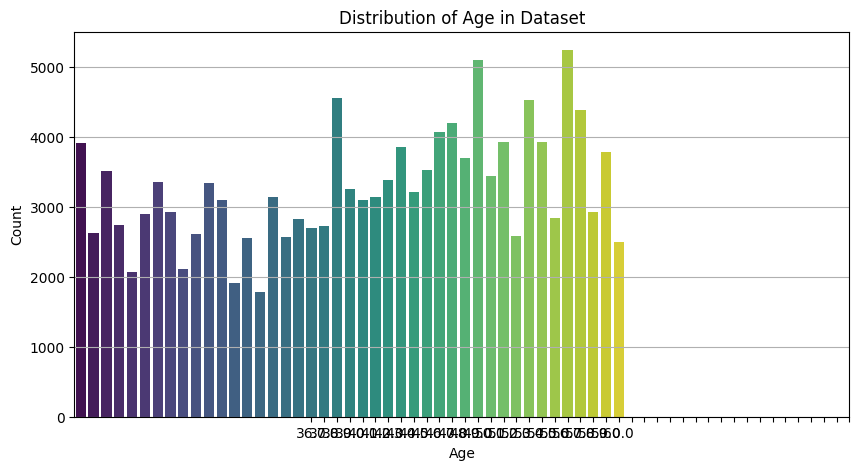

In [435]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", palette="viridis")

plt.xticks(np.arange(df["Age"].min(), df["Age"].max() + 1, 1))  # Show all ages
plt.title("Distribution of Age in Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y")

plt.show()


## Chi-square test

In [436]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Sleep Duration'], df['Depression'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Score: {chi2}")
print(f"P-Value: {p}")


Chi2 Score: 1197.7198998052588
P-Value: 9.159407421838203e-257


- ✔ Low P-Value (< 0.05) → Strong association between Sleep_Duration_Cleaned and Depression.
- ✔ High Chi2 Score → Higher dependence between the variables.
- so there is a strong conection between sleep duration and depression

In [437]:
def cramers_v(chi2, n, k1, k2):
    return np.sqrt(chi2 / (n * (min(k1 - 1, k2 - 1))))

n = df.shape[0]
k1, k2 = contingency_table.shape

cramers_v_value = cramers_v(chi2, n, k1, k2)
print(f"Cramér's V: {cramers_v_value}")


Cramér's V: 0.09226363988722716


# Train model

In [438]:
test_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,ll.b,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,b.ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,b.arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,8-9 hours,Moderate,b.sc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,bca,Yes,3.0,4.0,No


In [444]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Define features
numerical_features = ['Age', 'Work/Study Hours', 'CGPA']
categorical_features = ['Sleep Duration', 'Dietary Habits', 'Degree', 'City']
categorical_features_ordinal = ['Academic Pressure', 'Work Pressure',
                                'Study Satisfaction', 'Job Satisfaction',
                                'Financial Stress']  # Ordinal features with values 1, 2, 3, 4, 5, NaN
categorical_features_ordinal_binary = ['Gender', 'Working Professional or Student',
                                       'Have you ever had suicidal thoughts ?',
                                       'Family History of Mental Illness']

# Train-test split
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode binary columns using LabelEncoder before the pipeline
binary_encoder = LabelEncoder()
for col in categorical_features_ordinal_binary:
    X_train[col] = binary_encoder.fit_transform(X_train[col])
    X_val[col] = binary_encoder.transform(X_val[col])

# Create transformers for different feature types
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode ordinal features
])

# Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.9196517412935323
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     23027
           1       0.80      0.74      0.77      5113

    accuracy                           0.92     28140
   macro avg       0.87      0.85      0.86     28140
weighted avg       0.92      0.92      0.92     28140



In [442]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Define features
numerical_features = ['Age', 'Work/Study Hours', 'CGPA']
categorical_features = ['Sleep Duration', 'Dietary Habits', 'Degree', 'City']
categorical_features_ordinal = ['Academic Pressure', 'Work Pressure',
                                'Study Satisfaction', 'Job Satisfaction',
                                'Financial Stress']  # Ordinal features with values 1, 2, 3, 4, 5, NaN
categorical_features_ordinal_binary = ['Gender', 'Working Professional or Student',
                                       'Have you ever had suicidal thoughts ?',
                                       'Family History of Mental Illness']

# Train-test split
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode binary columns using LabelEncoder before the pipeline
binary_encoder = LabelEncoder()
for col in categorical_features_ordinal_binary:
    X_train[col] = binary_encoder.fit_transform(X_train[col])
    X_val[col] = binary_encoder.transform(X_val[col])

# Create transformers for different feature types
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode ordinal features
])

# Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Model pipeline with Logistic Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8853589196872779
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     23027
           1       0.63      0.90      0.74      5113

    accuracy                           0.89     28140
   macro avg       0.80      0.89      0.83     28140
weighted avg       0.91      0.89      0.89     28140



In [441]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Define features
numerical_features = ['Age', 'Work/Study Hours', 'CGPA']
categorical_features = ['Sleep Duration', 'Dietary Habits', 'Degree', 'City']
categorical_features_ordinal = ['Academic Pressure', 'Work Pressure',
                                'Study Satisfaction', 'Job Satisfaction',
                                'Financial Stress']  # Ordinal features with values 1, 2, 3, 4, 5, NaN
categorical_features_ordinal_binary = ['Gender', 'Working Professional or Student',
                                       'Have you ever had suicidal thoughts ?',
                                       'Family History of Mental Illness']

# Train-test split
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode binary columns using LabelEncoder before the pipeline
binary_encoder = LabelEncoder()
for col in categorical_features_ordinal_binary:
    X_train[col] = binary_encoder.fit_transform(X_train[col])
    X_val[col] = binary_encoder.transform(X_val[col])

# Create transformers for different feature types
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode ordinal features
])

# Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=1))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.9196872778962332
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     23027
           1       0.79      0.76      0.77      5113

    accuracy                           0.92     28140
   macro avg       0.87      0.86      0.86     28140
weighted avg       0.92      0.92      0.92     28140



In [445]:
from google.colab import files

# Assuming 'model' is your trained model and 'test_df' is your test dataset

# Prepare test data for prediction (drop the 'Depression' column if it exists)
X_test = test_df.drop(columns=['Depression'], errors='ignore')  # Avoid error if 'Depression' is not in test set
test_ids = test_df['id']  # Assuming 'id' is the unique identifier in the test data

# Predict Depression for the test dataset
y_pred_test = model.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Depression' values
output_df = pd.DataFrame({
    'id': test_ids,
    'Depression': y_pred_test
})

# Save the DataFrame to a CSV file
output_df.to_csv('/content/predictions.csv', index=False)

# Download the CSV file from Colab
files.download('/content/predictions.csv')

print("CSV file 'predictions.csv' created and ready for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'predictions.csv' created and ready for download.


In [443]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Define features
numerical_features = ['Age', 'Work/Study Hours', 'CGPA']
categorical_features = ['Sleep Duration', 'Dietary Habits', 'Degree', 'City']
categorical_features_ordinal = ['Academic Pressure', 'Work Pressure',
                                'Study Satisfaction', 'Job Satisfaction',
                                'Financial Stress']  # Ordinal features with values 1, 2, 3, 4, 5, NaN
categorical_features_ordinal_binary = ['Gender', 'Working Professional or Student',
                                       'Have you ever had suicidal thoughts ?',
                                       'Family History of Mental Illness']

# Train-test split
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode binary columns using LabelEncoder before the pipeline
binary_encoder = LabelEncoder()
for col in categorical_features_ordinal_binary:
    X_train[col] = binary_encoder.fit_transform(X_train[col])
    X_val[col] = binary_encoder.transform(X_val[col])

# Create transformers for different feature types
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing values using KNN (k=5)
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode ordinal features
])

# Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, categorical_features_ordinal)
    ]
)

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=1))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.9189410092395167
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     23027
           1       0.79      0.76      0.77      5113

    accuracy                           0.92     28140
   macro avg       0.87      0.86      0.86     28140
weighted avg       0.92      0.92      0.92     28140

